In [1]:
from metrics import PerSNMetric
from efficiencyTable import EfficiencyTable

/usr/local/manual/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from OpSimSummary import summarize_opsim as oss

In [3]:
import pandas as pd
import sncosmo

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
import os
import numpy as np
import copy

In [5]:
from lsst.sims.photUtils import BandpassDict

## Setup : Bandpasses

In [6]:
# Catsim bandpasses
lsst_bp = BandpassDict.loadTotalBandpassesFromFiles()

In [7]:
# sncosmo Bandpasses required for fitting
throughputsdir = os.getenv('THROUGHPUTS_DIR')

from astropy.units import Unit
bandPassList = ['u', 'g', 'r', 'i', 'z', 'y']
banddir = os.path.join(os.getenv('THROUGHPUTS_DIR'), 'baseline')

for band in bandPassList:

    # setup sncosmo bandpasses
    bandfname = banddir + "/total_" + band + '.dat'


    # register the LSST bands to the SNCosmo registry
    # Not needed for LSST, but useful to compare independent codes
    # Usually the next two lines can be merged,
    # but there is an astropy bug currently which affects only OSX.
    numpyband = np.loadtxt(bandfname)
    print band
    sncosmoband = sncosmo.Bandpass(wave=numpyband[:, 0],
                                   trans=numpyband[:, 1],
                                   wave_unit=Unit('nm'),
                                   name=band)
    sncosmo.registry.register(sncosmoband, force=True)

u
g
r
i
z
y


In [8]:
et = EfficiencyTable.fromDES_EfficiencyFile('example_data/SEARCHEFF_PIPELINE_DES.DAT')

In [9]:
from lsst.sims.catUtils.mixins import SNObject

In [10]:
opsimHDF = os.path.join(os.getenv('HOME'), 'data', 'LSST', 'OpSimData', 'storage.h5')
summarydf = pd.read_hdf(opsimHDF, 'table')
# df = df.query('propID == [364, 366]')

In [11]:
summarydf.head()

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,gamma,N0sq,alpha
0,1,1189,364,316,1.676483,-1.082473,y,2771,49353.032079,0,...,0,0,1.620307,0.000000,21.084291,1.643930,-1.108924,0.039924,0.000002,0.039924
1,2,1189,364,372,1.694120,-1.033972,y,2810,49353.032525,0,...,0,0,0.049266,4.542362,21.088257,1.664257,-1.060423,0.039924,0.000002,0.039924
2,3,1189,364,441,1.708513,-0.985271,y,2848,49353.032971,0,...,0,0,0.049298,4.561422,21.091100,1.680878,-1.011722,0.039924,0.000002,0.039924
3,4,1189,364,505,1.720374,-0.936476,y,2887,49353.033417,0,...,0,0,0.049266,4.570186,21.092714,1.694604,-0.962927,0.039924,0.000002,0.039924
4,5,1189,364,587,1.730248,-0.887672,y,2925,49353.033864,0,...,0,0,0.049177,4.568530,21.093091,1.706054,-0.914123,0.039924,0.000002,0.039924


In [12]:
summarydf = summarydf.query('propID == [364, 366]').query('night < 365')

In [13]:
so = oss.SummaryOpsim(summarydf)

In [14]:
ss = so.simlib(fieldID=309)

In [ ]:
_ = so.cadence_plot(fieldID=309, mjd_center=49540)

In [16]:
qm = PerSNMetric(fieldID=309, t0=49540, summarydf=summarydf, lsst_bp=lsst_bp)

In [17]:
cm = qm.cadence_Matrix(fieldID=309, mjd_center=49540, mjd_range=[-30., 50.])

/usr/local/manual/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


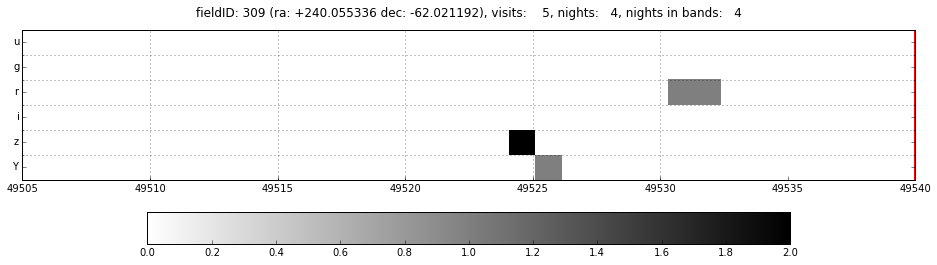

In [18]:
cm = qm.cadence_plot(fieldID=309, mjd_center=49540, mjd_range=[-30, -5])

In [19]:
qm = PerSNMetric(fieldID=309, t0=49540, summarydf=ss, lsst_bp=lsst_bp, efficiency=et)

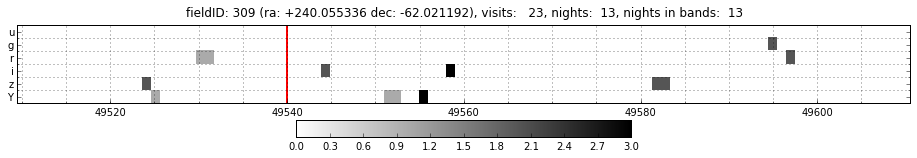

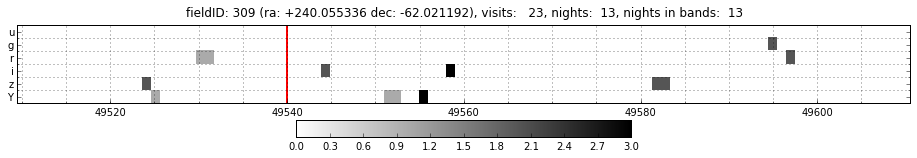

In [20]:
qm.SNCadence[0]

In [24]:
qm.summary.head()

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,fiveSigmaDepth,ditheredRA,ditheredDec,gamma,N0sq,alpha,MJDay,simLibPsf,simLibZPTAVG,simLibSkySig
54984,54932,1189,364,309,4.189756,-1.082474,u,6337289,49426.348262,73,...,23.535869,4.165341,-1.089087,0.039553,0.000001,0.039553,49426,2.394713,29.720676,6.708331
62174,62118,1189,364,309,4.189756,-1.082474,i,7018234,49434.229565,81,...,23.346593,4.230447,-1.089087,0.039780,0.000001,0.039780,49434,1.827268,31.513459,56.620281
62201,62145,1189,364,309,4.189756,-1.082474,i,7019269,49434.241549,81,...,23.504851,4.230447,-1.089087,0.039745,0.000001,0.039745,49434,1.647309,31.521535,54.636699
65712,65656,1189,364,309,4.189756,-1.082474,Y,7364902,49438.241925,85,...,21.193041,4.136860,-1.085780,0.039916,0.000002,0.039916,49438,2.127764,29.489042,54.807291
65717,65661,1189,364,309,4.189756,-1.082474,Y,7365094,49438.244152,85,...,21.203663,4.136860,-1.085780,0.039915,0.000002,0.039915,49438,2.107777,29.489911,54.829225


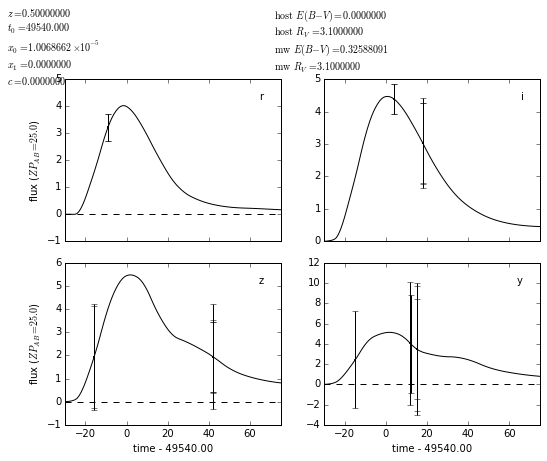

In [22]:
qm.lcplot(nightlyCoadd=False)

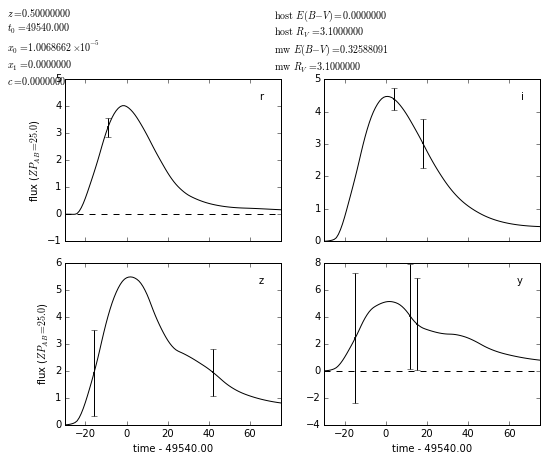

In [23]:
qm.lcplot(nightlyCoadd=True)

## Scratch

In [28]:
qm.qualityMetric()

0.0029671277166204053

In [29]:
qm.discoveryMetric()

0.99995137946174906

In [ ]:
_ = qm.cadence_plot(fieldID=309, mjd_center=49540, mjd_range=[-30., 50.])

In [ ]:
fields = so.fieldIds

In [ ]:
map(lambda x: so.cadence_Matrix(fieldID=x).count(), [fields[0]])

In [ ]:
so.cadence_Matrix(fieldID=290).count()

In [ ]:
summarydf.columns

In [ ]:
qm_309 = PerSNMetric(fieldID=309, t0=49437+15, summarydf=summarydf, lsst_bp=lsst_bp)

In [ ]:
qm_309.simlib(309)

In [ ]:
qm_309 = PerSNMetric(fieldID=309, t0=49437+15, summarydf=summarydf, lsst_bp=lsst_bp, efficiency=et)

In [ ]:
xx =qm_309.simlib(290)

In [ ]:
xx.columns

In [ ]:
gg = xx.groupby('night')

In [ ]:
gg.groups.keys()

In [ ]:
max(map(lambda x: len(gg.get_group(x).MJDay.unique()), gg.groups.keys()))

In [ ]:
qm_309.cadence_Matrix(summarydf=summarydf, mjd_center=49540, mjd_range=[-30., 50])

qm_309.lightcurve.columns

In [ ]:
qm_309.lcplot()

In [ ]:
state = qm_309.SN.SNstate
state['z'] = 0.1

In [ ]:
qm_309 = PerSNMetric(summarydf=summarydf, fieldID=309, t0=49437+15, lsst_bp=lsst_bp, efficiency=et)

In [ ]:
qm_309.lightcurve

In [ ]:
qm_309.lcplot()

In [ ]:
x = qm_309.discoveryMetric()

In [ ]:
print (x)

In [ ]:
np.log(x)

In [ ]:
np.log(2)

In [ ]:
np.log(np.array([10., 2]))

In [ ]:
1000 * 34 /24. / 60. / 60.

In [ ]:
so = oss.SummaryOpsim(summarydf)

In [ ]:
f = so.fieldIds

In [ ]:
_ = so.cadence_plot(f[5], observedOnly=True)

In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [61]:
outDir ='LightCurve'
dbFile = 'enigma_1189_sqlite.db'
opsimdb = utils.connectOpsimDb(dbFile)
resultsDb = db.ResultsDb(outDir=outDir)

In [62]:
filters = ['u','g','r','i','z','y']
colors={'u':'cyan','g':'g','r':'y','i':'r','z':'m', 'y':'k'}


In [63]:
# Set RA, Dec for a single point in the sky. in radians.
ra = np.radians(0.)
dec = np.radians(0.)
# SNR limit (Don't use points below this limit)
snrLimit = 5.
# Demand this many points above SNR limit before plotting LC
nPtsLimit = 6

In [98]:
# The pass metric just passes data straight through.
metric = metrics.PassMetric(cols=['filter','fieldID','finSeeing','fiveSigmaDepth',
                                  'expMJD','airmass', 'propID', 'night', 'filtSkyBrightness'])
slicer = slicers.UserPointsSlicer(ra,dec,lonCol='fieldRA',latCol='fieldDec')
sql = 'night < 366'
bundle = metricBundles.MetricBundle(metric,slicer,sql)
bg =  metricBundles.MetricBundleGroup({0:bundle}, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)

In [99]:
bg.runAll()

Querying database with constraint night < 366
Found 272657 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [100]:
llc = pd.DataFrame.from_records(bundle.metricValues.data[0])

In [96]:
grouped = llc.groupby(['night','filter','fieldID'])

In [102]:
llc.fieldID.unique()

array([2655, 2656])

In [97]:
grouped.apply(len)

night  filter  fieldID
191    i       2536       2
192    g       2536       2
       z       2536       1
194    r       2536       2
197    i       2536       2
198    z       2536       2
199    y       2536       3
               2656       3
201    y       2536       3
202    y       2536       1
204    y       2536       2
222    u       2762       1
224    i       2655       2
225    i       2762       2
230    y       2762       2
239    r       2656       1
242    g       2655       2
               2762       2
246    u       2655       1
250    u       2656       1
251    i       2656       2
255    z       2655       2
256    z       2655       2
257    z       2655       2
259    y       2656       1
278    r       2655       6
               2656       4
284    i       2655       2
292    y       2656       5
293    z       2655       6
               2656       6
295    z       2655       1
301    r       2656       2
       y       2656       1
331    y       2655      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1188428d0>]], dtype=object)

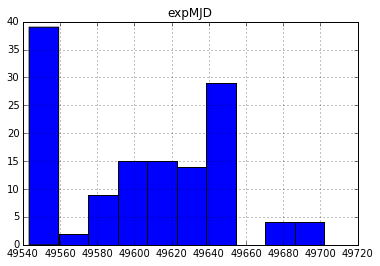

In [101]:
llc.hist('expMJD')

In [68]:
numSN = 100;
#from np.random.random import state
times = np.random.uniform(llc.expMJD.min(),llc.expMJD.max(), size=numSN)

In [67]:
llc = pd.DataFrame.from_records(bundle.metricValues.data[0])

In [63]:
q = PerSNMetric(t0=times[0], summarydf=llc, raCol='ditheredRA', decCol='ditheredDec', lsst_bp=lsst_bp )

In [64]:
q.summary.columns

Index([u'obsHistID', u'filtSkyBrightness', u'airmass', u'ditheredDec', u'filter', u'fiveSigmaDepth', u'expMJD', u'night', u'finSeeing', u'ditheredRA', u'fieldID', u'propID', u'MJDay'], dtype='object')

In [65]:
q.SN.SNstate

{'MWE(B-V)': 0.096905916929244995,
 'ModelSource': 'salt2-extended',
 '_dec': -1.3608320592152183,
 '_ra': 359.01480196995561,
 'c': 0.0,
 'hostebv': 0.0,
 'hostr_v': 3.1000000000000001,
 'mwebv': 0.0,
 'mwr_v': 3.1000000000000001,
 't0': 49647.502526700096,
 'x0': 1.0068661711630977e-05,
 'x1': 0.0,
 'z': 0.5}

In [66]:
q.lightcurve

,time,band,flux,fluxerr,zp,zpsys,SNR,finSeeing,airmass,filtSkyBrightness,fiveSigmaDepth,propID,night,DetectionEfficiency
297,49654.037605,r,5.959475e-10,2.197035e-11,0,ab,27.125084,0.493046,1.239617,21.124277,24.988703,364,301,NaN
276,49654.024117,r,5.962488e-10,2.252011e-11,0,ab,26.476282,0.498456,1.287444,21.093361,24.956614,364,301,NaN
136,49631.116856,r,2.478308e-10,2.381561e-11,0,ab,10.406235,0.584763,1.180692,21.164648,24.829550,364,278,NaN
857,49631.117755,r,2.478678e-10,2.407774e-11,0,ab,10.294482,0.587970,1.195237,21.154437,24.817052,364,278,NaN
187,49631.097146,r,2.470197e-10,2.473334e-11,0,ab,9.987319,0.597903,1.223573,21.135011,24.786316,364,278,NaN
176,49631.051402,r,2.451390e-10,2.508038e-11,0,ab,9.774136,0.560997,1.435539,21.006862,24.770221,364,278,NaN
851,49631.095797,r,2.469642e-10,2.529885e-11,0,ab,9.761878,0.604729,1.254533,21.114463,24.760621,364,278,NaN
132,49631.109299,r,2.475198e-10,2.576676e-11,0,ab,9.606168,0.631431,1.194592,21.154886,24.739914,364,278,NaN
855,49631.110199,r,2.475568e-10,2.612081e-11,0,ab,9.477380,0.635823,1.212387,21.142607,24.724469,364,278,NaN
174,49631.128344,r,2.483038e-10,2.629111e-11,0,ab,9.444399,0.652759,1.165170,21.175731,24.717211,364,278,NaN


In [78]:
q.deltamusq **0.5

0.14169365810701104

In [79]:
q.qualityMetric()

0.12452002047361176

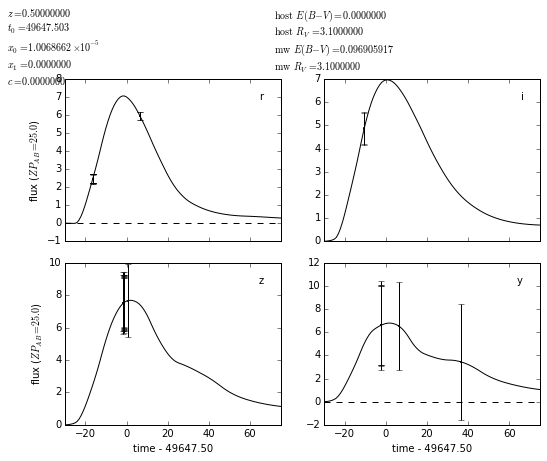

In [81]:
q.lcplot()

In [95]:
so.cadence_plot(mjd_center=q.t0, summarydf=q.summary, mjd_range=[-30., 50])

ValueError: cannot convert float NaN to integer

In [90]:
q.SNCadence

ValueError: cannot convert float NaN to integer

In [108]:
M = so.cadence_Matrix(q.summary, mjd_center=q.t0, mjd_range=[-30., 50.], Filters=['u', 'g', 'r', 'i', 'z', 'y'])

In [100]:
M.describe()

,u,g,r,i,z,Y
count,0,0,0,0,0,0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
q.summary.columns

Index([u'obsHistID', u'filtSkyBrightness', u'airmass', u'ditheredDec', u'filter', u'fiveSigmaDepth', u'expMJD', u'night', u'finSeeing', u'ditheredRA', u'fieldID', u'propID', u'MJDay'], dtype='object')

In [106]:
q.summary.query('expMJD > 49617 and expMJD < 49797')

,obsHistID,filtSkyBrightness,airmass,ditheredDec,filter,fiveSigmaDepth,expMJD,night,finSeeing,ditheredRA,fieldID,propID,MJDay
114,229177,17.000000,1.457985,-0.003342,z,22.377302,49648.000403,295,0.574362,6.263196,2655,364,49648
117,227675,17.617678,1.209316,-0.003342,z,22.658431,49646.061726,293,0.597362,6.255560,2655,364,49646
128,227716,17.569365,1.173414,-0.003342,z,22.563434,49646.080690,293,0.638904,6.255560,2655,364,49646
132,215338,21.154886,1.194592,-0.006648,r,24.739914,49631.109299,278,0.631431,6.253651,2655,364,49631
136,215354,21.164648,1.180692,-0.006648,r,24.829550,49631.116856,278,0.584763,6.253651,2655,364,49631
138,215237,21.049278,1.360111,-0.006648,r,24.623082,49631.062601,278,0.659654,6.253651,2655,364,49631
159,227613,17.716398,1.302907,-0.003342,z,22.649448,49646.033489,293,0.627088,6.255560,2655,364,49646
164,227647,17.659322,1.245142,-0.003342,z,22.653370,49646.049013,293,0.610564,6.255560,2655,364,49646
166,227875,17.426889,1.200337,-0.003342,z,22.802698,49646.154979,293,0.479279,6.255560,2655,364,49646
174,215379,21.175731,1.165170,-0.006648,r,24.717211,49631.128344,278,0.652759,6.253651,2655,364,49631


In [ ]:
xx = 

In [105]:
q.t0 + 50

49697.502526700096

In [ ]:
sncosmo.plot_lc(q.lightcurve

In [82]:
len(q.lightcurve)

34

In [59]:
llc.expMJD.describe()

count     1173.000000
mean     51372.910544
std       1010.900420
min      49544.299567
25%      50634.340406
50%      51412.174986
75%      52188.060636
max      52994.065574
Name: expMJD, dtype: float64

In [ ]:
ggd = llc.groupby('fieldID')

In [ ]:
k = ggd.groups.keys()
print k
map(lambda x: len(x), map(lambda y: ggd.get_group(y), k))

In [ ]:
bundle.metricValues.data[0]['filter']

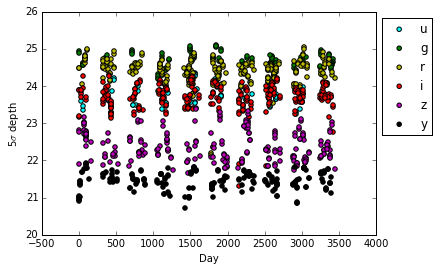

In [76]:
dayZero = bundle.metricValues.data[0]['expMJD'].min()
for fname in filters:
    good = np.where(bundle.metricValues.data[0]['filter'] == fname)
    plt.scatter(bundle.metricValues.data[0]['expMJD'][good]- dayZero, 
                bundle.metricValues.data[0]['fiveSigmaDepth'][good],
                c = colors[fname], label=fname)
plt.xlabel('Day')
plt.ylabel('5$\sigma$ depth')
plt.legend(scatterpoints=1, loc="upper left", bbox_to_anchor=(1,1))

In [84]:
pd.DataFrame.from_records(bundle.metricValues.data[0]).groupby('fieldID').groups.keys()

[2536, 2656, 2762, 2655]

In [103]:
from lsst.sims.utils import haversine

In [104]:
help(haversine)

Help on function haversine in module lsst.sims.utils.coordinateTransformations:

haversine(long1, lat1, long2, lat2)
    Return the angular distance between two points in radians
    
    @param [in] long1 is the longitude of point 1 in radians
    
    @param [in] lat1 is the latitude of point 1 in radians
    
    @param [in] long2 is the longitude of point 2 in radians
    
    @param [in] lat2 is the latitude of point 2 in radians
    
    @param [out] the angular separation between points 1 and 2 in radians
    
    From http://en.wikipedia.org/wiki/Haversine_formula



In [106]:
ra, dec = so.coords()

In [107]:
ra

[6.097944,
 4.189756,
 2.093429,
 5.86334,
 0.419846,
 5.446396,
 0.83679000000000003,
 4.6067020000000003,
 1.6764829999999999,
 2.5132729999999999,
 5.0265490000000002,
 1.2566360000000001,
 0.0,
 4.9132999999999996,
 1.369885,
 2.4000249999999999,
 2.6265239999999999,
 5.1397979999999999,
 1.1433869999999999,
 6.169937,
 0.113249,
 5.7552750000000001,
 0.52790999999999999,
 4.2978209999999999,
 1.9853639999999999,
 5.5544580000000003,
 0.72872700000000001,
 4.4986379999999997,
 1.7845470000000001,
 5.2514450000000004,
 1.031741,
 4.8016529999999999,
 1.481533,
 2.7381700000000002,
 6.0582890000000003,
 0.22489600000000001,
 2.2883779999999998,
 4.69313,
 1.5900559999999999,
 5.359966,
 0.92321900000000001,
 2.1798549999999999,
 5.9497679999999997,
 0.33341799999999999,
 5.6548670000000003,
 0.62831899999999996,
 4.3982299999999999,
 1.8849560000000001,
 2.07579,
 5.8457030000000003,
 0.43748199999999998,
 4.5890659999999999,
 1.6941200000000001,
 5.4640319999999996,
 0.8191540000000

In [ ]:
so._